<h1>Reinforcement Learning</h1>

In [762]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import math
from collections import defaultdict
np.random.seed(0)

<h2>Q1</h2>
<h3>Reward1</h3>

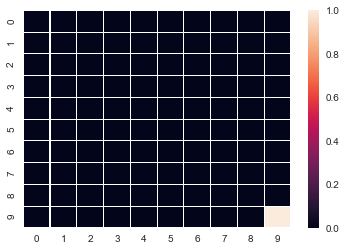

In [763]:
reward1 = np.zeros((10,10))
reward1[9,9] = 1
#cmap = ListedColormap(sns.color_palette("Blues"))
#cmap = sns.cm.rocket_r
sns.heatmap(reward1, linewidths=.1)

<h3>Reward2</h3>

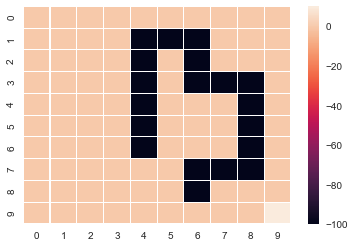

In [764]:
reward2 = np.zeros((10,10))
reward2[[i for i in range(1,7)] , 4] = -100
reward2[1,5] = -100
reward2[[i for i in range(1,4)] , 6] = -100
reward2[[i for i in range(7,9)] , 6] = -100
reward2[3,7] = -100
reward2[7,7] = -100
reward2[[i for i in range(3,8)] , 8] = -100
reward2[9,9] = 10
sns.heatmap(reward2, vmax=10, linewidths=.1)

<h3>State Space</h3>

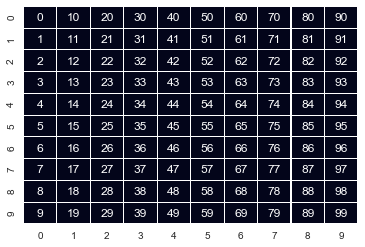

In [765]:
vals = np.arange(0,100)
state_vals = [vals[i:i+10] for i in range(0,100,10)]
state_space = np.array(state_vals).T
state_space
sns.heatmap(state_space, annot=True, fmt="d", linewidths=.1, vmax=0, cbar=False)

In [766]:
a = np.empty(10)
a.fill(-1)
modified_state_space = np.vstack((a, state_space, a))
b = np.empty((12,1))
b.fill(-1)
modified_state_space = np.hstack((b, modified_state_space, b))
modified_state_space

array([[ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
         -1.],
       [ -1.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.,
         -1.],
       [ -1.,   1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91.,
         -1.],
       [ -1.,   2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92.,
         -1.],
       [ -1.,   3.,  13.,  23.,  33.,  43.,  53.,  63.,  73.,  83.,  93.,
         -1.],
       [ -1.,   4.,  14.,  24.,  34.,  44.,  54.,  64.,  74.,  84.,  94.,
         -1.],
       [ -1.,   5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95.,
         -1.],
       [ -1.,   6.,  16.,  26.,  36.,  46.,  56.,  66.,  76.,  86.,  96.,
         -1.],
       [ -1.,   7.,  17.,  27.,  37.,  47.,  57.,  67.,  77.,  87.,  97.,
         -1.],
       [ -1.,   8.,  18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98.,
         -1.],
       [ -1.,   9.,  19.,  29.,  39.,  49.,  59.,  69.,  79.,  89.,  99.,
         -1.],
       [ -1.,  -1.,  

In [767]:
actions = ["R", "L", "U", "D"]
actions

['R', 'L', 'U', 'D']

In [768]:
def neighbors(currentst, nextst):
    if nextst == currentst or nextst == currentst+1 or nextst == currentst-1 or nextst == currentst+10 or nextst == currentst-10:
        return True
    return False

In [769]:
def get_transition_probability(current_state, next_st,  r, c, action, w = 0.1, modified_state_space=modified_state_space):
    n = modified_state_space.shape[1]
    if action == "R":
        next_state = modified_state_space[r, c+1]
    if action =="L":
        next_state = modified_state_space[r, c-1]
    if action == "U":
        next_state = modified_state_space[r-1, c]
    if action == "D":
        next_state = modified_state_space[r+1, c]
   
    if next_st == -1 or not neighbors(current_state, next_st):
        # transition not possible
        return 0  
    if next_state == -1 and (current_state ==0 or current_state==9 or current_state==90 or current_state==99):
        # corner states action moving off grid 
        if next_st == current_state:
            return (1-w+w/4+w/4)
        else:
            return (w/4)
    if next_state != -1 and (current_state ==0 or current_state==9 or current_state==90 or current_state==99):
        # corner states action moving on grid 
        if next_st == current_state:
            return (w/4+w/4)
        if next_state == next_st:
            return (1-w+w/4)
        else:
            return (w/4)
        
    if r == 1 or r == n-2 or c == 1 or c == n-2:
        # edge states
        if next_state == -1:
            # edge states action moving off grid
            if next_st == current_state:
                return (1-w+w/4)
            else:
                return (w/4)
        else:
            # edge states action moving on grid
            if next_st == next_state:
                return (1-w+w/4)
            else:
                return (w/4)
    else:
        # non boundary states
        if next_state == next_st:
            return (1-w+w/4)
        if neighbors(current_state, next_st) and current_state!=next_st:
            return (w/4)
        else:
            # action not possible
            return (0)
        

In [770]:
get_transition_probability(19, 19,  10, 2, "R", w = 0.1)

0.025

In [771]:
def get_neighbors(r, c, state_space=state_space):
    current_state = state_space[r,c]
    neighbor_list = [(r,c)]

    # corner states
    if current_state == 0:
        neighbor_list.extend([(r+1,c), (r,c+1)])
        return neighbor_list
    if current_state == 9:
        neighbor_list.extend([(r-1,c), (r,c+1)])
        return neighbor_list
    if current_state == 90:
        neighbor_list.extend([(r+1,c), (r,c-1)])
        return neighbor_list
    if current_state == 99:
        neighbor_list.extend([(r-1,c), (r,c-1)])
        return neighbor_list
    
    # edge states
    if r==0 and current_state!=0 and current_state!=90:
        neighbor_list.extend([(r,c+1), (r,c-1), (r+1,c)])
        return neighbor_list
    if r==9 and current_state!=9 and current_state!=99:
        neighbor_list.extend([(r,c+1), (r,c-1), (r-1,c)])
        return neighbor_list
    if c==0 and current_state!=0 and current_state!=9:
        neighbor_list.extend([(r,c+1), (r-1,c), (r+1,c)])
        return neighbor_list
    if c==9 and current_state!=90 and current_state!=99:
        neighbor_list.extend([(r,c-1),(r-1,c),(r+1,c)])
        return neighbor_list
    # other states
    else:
        neighbor_list.extend([(r+1,c),(r-1,c),(r,c+1),(r,c-1)])
        return neighbor_list

In [772]:
def get_estimation(s, reward, value, discount, modified_state_space=modified_state_space, action_set=actions):
    actual_neighbors = get_neighbors(s[0]-1, s[1]-1)
    neighbor_states = [(i[0]+1, i[1]+1) for i in actual_neighbors]
    probs = defaultdict(list)
    action_map = {ac:actions.index(ac) for ac in action_set}
    estimations = np.zeros((len(action_set), len(neighbor_states)))

    for ac in action_set:
        for ns in neighbor_states:
            probs[ac].append(get_transition_probability(modified_state_space[s], modified_state_space[ns],  s[0], s[1], ac))
     
    for ac in action_set:
        for n in range(len(actual_neighbors)):
            estimations[action_map[ac], n] = probs[ac][n] * (reward[actual_neighbors[n]]
                                                             + discount*value[actual_neighbors[n]])
            
    return estimations

In [773]:
def value_iteration(reward, state_space, action_set, w, discount, epsilon):
    n = len(state_space)
    states = [(i,j) for i in range(n) for j in range(n)]
    optimal_value = np.zeros((n,n))
    optimal_policy = np.zeros((n,n))
    delta = math.inf
    # estimation step
    while delta > 0.01:
        delta = 0
        for s in states:
            v = optimal_value[s]
            action_estimations = get_estimation((s[0]+1,s[1]+1), reward, optimal_value, discount)
            optimal_value[s] = max(np.sum(action_estimations, axis=1))
            #optimal_policy[s] = np.argmax(np.sum(action_estimations, axis=1))
            delta = max(delta, abs(v - optimal_value[s]))
            
    # computation step
    for s in states:
        action_estimations = get_estimation((s[0]+1,s[1]+1), reward, optimal_value, discount)
        optimal_policy[s] = np.argmax(np.sum(action_estimations, axis=1))

    return optimal_value, optimal_policy

In [774]:
value1, policy1 = value_iteration(reward1, state_space, actions, 0.1, 0.8, 0.01)
print(value1)

[[ 0.04179568  0.06283791  0.089742    0.12384898  0.16708096  0.22188288
   0.29135376  0.37942014  0.49098293  0.60964773]
 [ 0.06283791  0.08787011  0.12155728  0.16451357  0.21924607  0.28898976
   0.37787112  0.49106061  0.63321853  0.78735399]
 [ 0.089742    0.12155728  0.16438987  0.21913198  0.28890328  0.37782648
   0.49115592  0.63549019  0.81735527  1.01859718]
 [ 0.12384898  0.16451357  0.21913198  0.28889981  0.37782476  0.49115916
   0.6356006   0.81960951  1.05219113  1.31505855]
 [ 0.16708096  0.21924607  0.28890328  0.37782476  0.49115918  0.63560325
   0.81969511  1.05426506  1.35157155  1.69507283]
 [ 0.22188288  0.28898976  0.37782648  0.49115916  0.63560325  0.8196963
   1.05432164  1.35332408  1.73318006  2.18223115]
 [ 0.29135376  0.37787112  0.49115592  0.6356006   0.81969511  1.05432164
   1.35335083  1.73446085  2.21952677  2.80680236]
 [ 0.37942014  0.49106061  0.63549019  0.81960951  1.05426506  1.35332408
   1.73446085  2.22020148  2.839257    3.60762627]
 

<h2>Q2</h2>
<h3>Reward1 optimal values</h3>

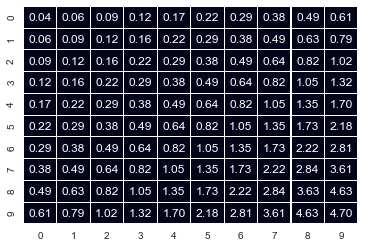

In [775]:
sns.heatmap(state_space, annot=value1, fmt='.2f', linewidths=.1, vmax=0, cbar=False)

<h2>Q3</h2>
<h3>Reward1 Heatmap</h3>

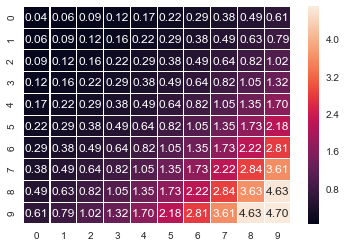

In [776]:
sns.heatmap(value1, annot=True, fmt='.2f', linewidths=.1)

In [777]:
print(policy1)

[[ 0.  0.  0.  0.  0.  0.  0.  3.  3.  3.]
 [ 3.  0.  0.  0.  0.  0.  3.  3.  3.  3.]
 [ 3.  3.  0.  0.  0.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  0.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  0.  0.  3.  3.  3.  3.  3.]
 [ 3.  3.  0.  0.  0.  3.  3.  3.  3.  3.]
 [ 3.  0.  0.  0.  0.  0.  3.  3.  3.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [ ]:
value2, policy2 = value_iteration(reward2, state_space, actions, 0.1, 0.8, 0.01)
print(value2)

[[  6.48477467e-01   7.94106515e-01   8.25237900e-01   5.36245558e-01
   -2.37043156e+00  -4.23381678e+00  -1.92052971e+00   1.13110795e+00
    1.59435584e+00   2.03820726e+00]
 [  8.29851948e-01   1.02123596e+00   1.06603296e+00  -1.86790436e+00
   -6.73821942e+00  -8.67375446e+00  -6.36979468e+00  -1.29479626e+00
    1.92834321e+00   2.61046947e+00]
 [  1.06360962e+00   1.31651254e+00   1.45007729e+00  -1.62402502e+00
   -6.74150886e+00  -1.39111818e+01  -9.64922518e+00  -5.51104325e+00
   -1.31012708e-01   3.35905866e+00]
 [  1.36025245e+00   1.69269877e+00   1.94802285e+00  -1.23216899e+00
   -6.32308479e+00  -7.97760603e+00  -7.93667980e+00  -9.42386879e+00
   -1.91442835e+00   4.39062525e+00]
 [  1.73657224e+00   2.17160228e+00   2.58983267e+00  -7.25587435e-01
   -5.83072992e+00  -3.25362550e+00  -3.23020014e+00  -7.41906241e+00
    1.71898209e+00   9.16310147e+00]
 [  2.21393346e+00   2.78108417e+00   3.41709976e+00  -2.75630965e-02
   -5.09866208e+00  -5.49015498e-01  -4.76652

<h2>Q6</h2>
<h3>Reward2 optimal values</h3>

In [ ]:
sns.heatmap(state_space, annot=value2, fmt='.2f', linewidths=.1, vmax=0, cbar=False)

<h2>Q7</h2>
<h3>Reward2 Heatmap</h3>

In [ ]:
sns.heatmap(value2, annot=True, linewidths=.1)

In [ ]:
print(policy2)

In [ ]:
arrow_map = {0:'\u2192', 1:'\u2190', 2:'\u2191',3:'\u2193'}

In [ ]:
def arrow_conversion(policy):
    policy_arrows = np.array(policy, dtype="object")
    for row in range(len(policy)):
        for col in range(len(policy)):
            idx = policy[row,col]
            policy_arrows[row,col] = arrow_map[idx]
    return policy_arrows

<h2>Q5</h2>
<h3>Reward1 optimal policy</h3>

In [ ]:
policy1_arrows = arrow_conversion(policy1)
sns.heatmap(policy1, annot=policy1_arrows, fmt='', linewidths=.1, cbar=False)

<h2>Q9</h2>
<h3>Reward2 optimal policy</h3>

In [ ]:
policy2_arrows = arrow_conversion(policy2)
sns.heatmap(policy2, annot=policy2_arrows, fmt='', linewidths=.1, cbar=False)

In [ ]:
sns.heatmap(reward2)